In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [3]:
df.shape

(100000, 9)

In [4]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
df.isnull().values.any()

False

<ipython-input-6-3e4d6b451ea5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


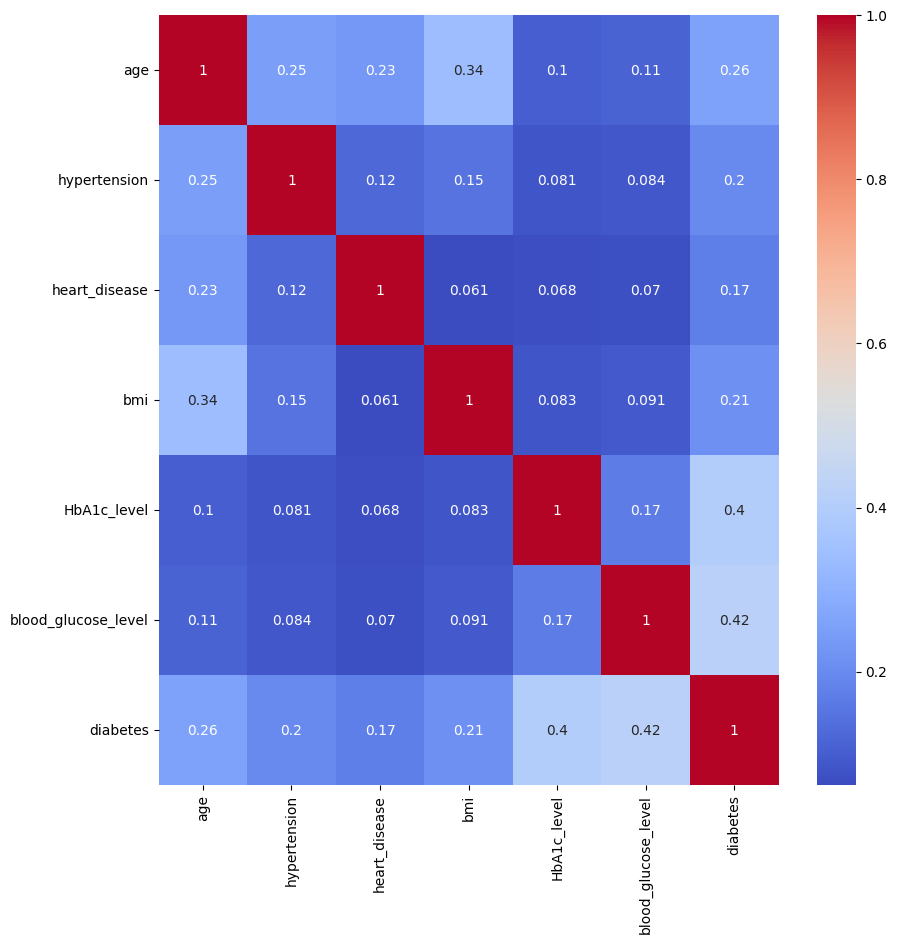

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation=df.corr()
top_corr_features = correlation.index
plt.figure(figsize=(10,10))
g=sns.heatmap(correlation,annot=True,cmap="coolwarm")

In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


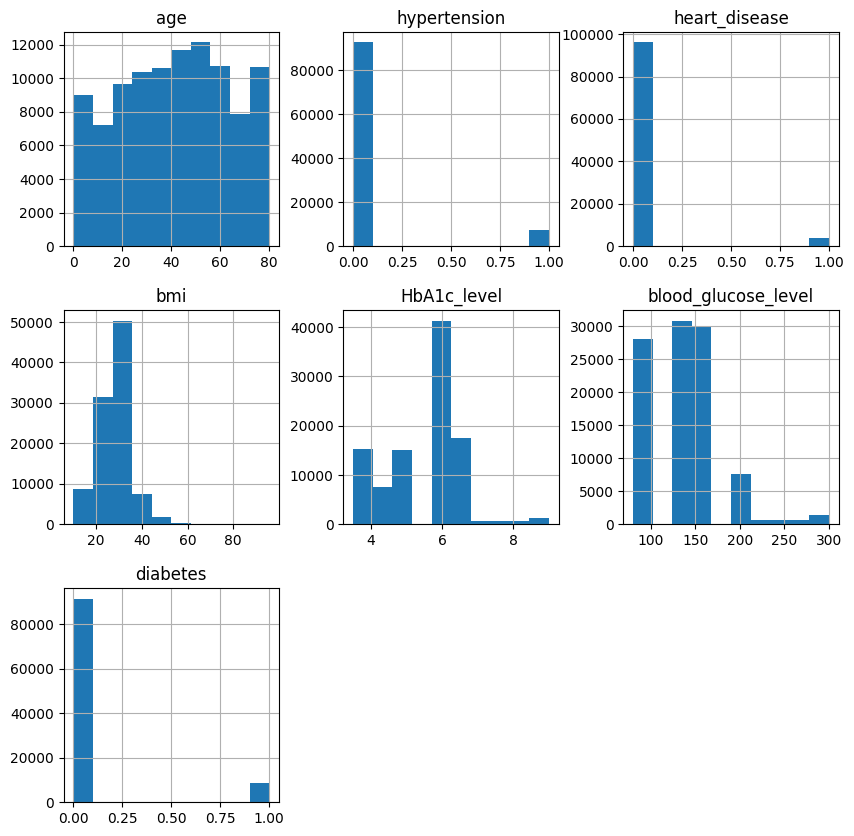

In [8]:
df.hist(bins=10,figsize=(10,10))
plt.show()

# **Checking the data type of diabetes column**

In [9]:
print(df['diabetes'].dtype)


int64


# **Converting the diabetes column into Boolaen data type**


In [10]:
df['diabetes'] = df['diabetes'].astype(bool)


In [11]:
diabetes_map = {True: 1, False: 0}

In [12]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [13]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **LOGISTIC REGRESSION ALGORITHM**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
feature_columns = ['gender', 'hypertension', 'bmi', 'smoking_history','heart_disease','age','HbA1c_level','blood_glucose_level']
predicted_class = ['diabetes']
X = df[feature_columns]
y = df[predicted_class]


In [16]:
X_encoded = pd.get_dummies(X, columns=['gender', 'smoking_history', 'heart_disease'])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)



In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train.values.ravel())


LogisticRegression(random_state=42)

In [19]:
y_pred = model.predict(X_test)


In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.96
Confusion Matrix:
[[27202   251]
 [  972  1575]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.86      0.62      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.91      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



# **Random Forest Algorithm**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
feature_columns = ['gender', 'smoking_history', 'heart_disease', 'blood_glucose_level', 'bmi', 'hypertension', 'age']
predicted_class = ['diabetes']
X = df[feature_columns]
y = df[predicted_class]
X_encoded = pd.get_dummies(X, columns=['gender', 'smoking_history', 'heart_disease'])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)


In [23]:
rf_model = RandomForestClassifier(random_state=42)


In [24]:
rf_model.fit(X_train, y_train.values.ravel())


RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf_model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.94
Confusion Matrix:
[[27083   370]
 [ 1416  1131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27453
           1       0.75      0.44      0.56      2547

    accuracy                           0.94     30000
   macro avg       0.85      0.72      0.76     30000
weighted avg       0.93      0.94      0.93     30000



# **Gradient Boosting Algorithm**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
feature_columns = ['gender', 'smoking_history', 'heart_disease', 'blood_glucose_level', 'bmi', 'hypertension', 'age']
predicted_class = ['diabetes']
X = df[feature_columns]
y = df[predicted_class]
X_encoded = pd.get_dummies(X, columns=['gender', 'smoking_history', 'heart_disease'])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)


In [29]:
gb_model = GradientBoostingClassifier(random_state=42)


In [30]:
gb_model.fit(X_train, y_train.values.ravel())


GradientBoostingClassifier(random_state=42)

In [31]:
y_pred = gb_model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.95
Confusion Matrix:
[[27392    61]
 [ 1493  1054]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27453
           1       0.95      0.41      0.58      2547

    accuracy                           0.95     30000
   macro avg       0.95      0.71      0.77     30000
weighted avg       0.95      0.95      0.94     30000



# **Naive Bayes Classifier Algorithm**

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
feature_columns = ['gender', 'smoking_history', 'heart_disease', 'blood_glucose_level', 'bmi', 'hypertension', 'age']
predicted_class = ['diabetes']
X = df[feature_columns]
y = df[predicted_class]
X_encoded = pd.get_dummies(X, columns=['gender', 'smoking_history', 'heart_disease'])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)


In [36]:
nb_model = GaussianNB()


In [37]:
nb_model.fit(X_train, y_train.values.ravel())


GaussianNB()

In [38]:
y_pred = nb_model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [40]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.85
Confusion Matrix:
[[23609  3844]
 [  779  1768]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     27453
           1       0.32      0.69      0.43      2547

    accuracy                           0.85     30000
   macro avg       0.64      0.78      0.67     30000
weighted avg       0.91      0.85      0.87     30000



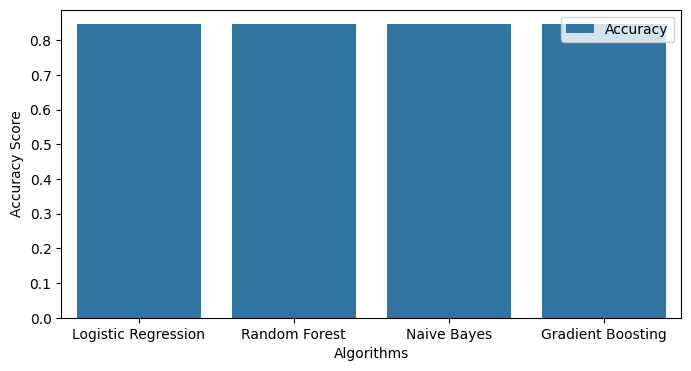

In [41]:
import seaborn as sns
ax=plt.figure(figsize=(8,4))
sns.barplot(x=['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'], y=accuracy, label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithms')
plt.show()
